<a href="https://colab.research.google.com/github/sreekanthTa/BreedPredictionDL/blob/main/DOG_BREED_IDENTIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
# !unzip '/content/drive/MyDrive/MachineLearning/dog-breed-identification.zip' -d '/content/drive/MyDrive/MachineLearning/dog-breed-ide'

In [50]:
import tensorflow as tf;
print(tf.__version__)

2.18.0


In [51]:
import pandas as pd;

labels_data = pd.read_csv('/content/drive/MyDrive/MachineLearning/dog-breed-ide/labels.csv')
labels_data.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


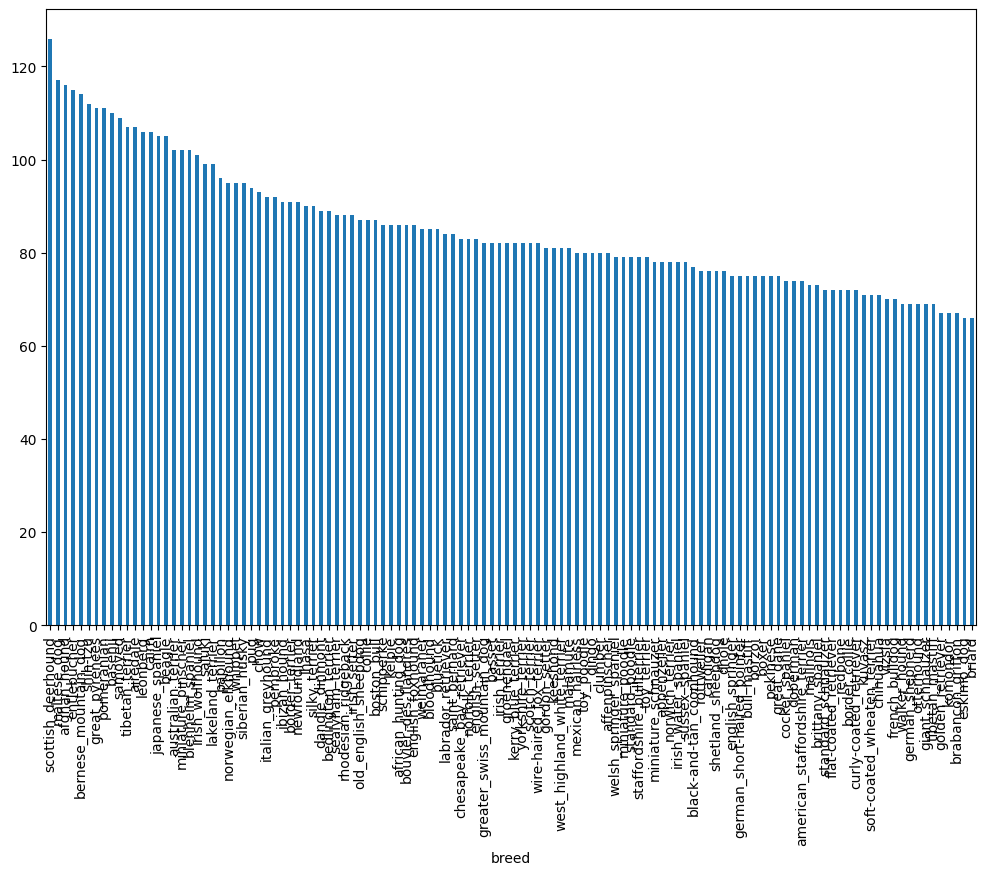

In [52]:
labels_data["breed"].value_counts().plot.bar(figsize=(12, 8));

In [53]:
labels_data["breed"].value_counts().median()

82.0

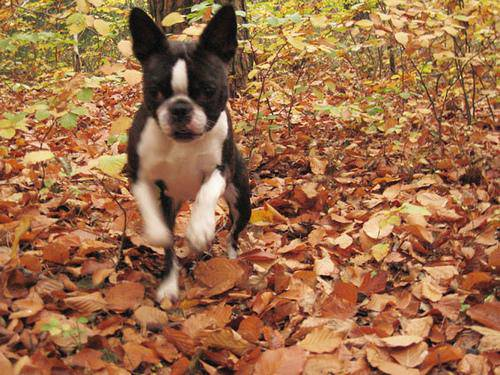

In [54]:
from IPython.display import Image

Image('/content/drive/MyDrive/MachineLearning/dog-breed-ide/train/000bec180eb18c7604dcecc8fe0dba07.jpg')

In [55]:
import os
len(os.listdir('/content/drive/MyDrive/MachineLearning/dog-breed-ide/train/'))

5867

In [56]:
path = '/content/drive/MyDrive/MachineLearning/dog-breed-ide/train/'
filenames = [path + fname +'.jpg' for fname in labels_data["id"]]

filenames[:10]

['/content/drive/MyDrive/MachineLearning/dog-breed-ide/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/MachineLearning/dog-breed-ide/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/MachineLearning/dog-breed-ide/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/MachineLearning/dog-breed-ide/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/MachineLearning/dog-breed-ide/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/MachineLearning/dog-breed-ide/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/MachineLearning/dog-breed-ide/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/MachineLearning/dog-breed-ide/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/MachineLearning/dog-breed-ide/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/MachineLearning/dog-breed-ide/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [57]:
len(filenames)

10222

Hello

In [58]:
import os
len(os.listdir('/content/drive/MyDrive/MachineLearning/dog-breed-ide/train/'))

5867

In [59]:
import os
if(len(os.listdir('/content/drive/MyDrive/MachineLearning/dog-breed-ide/train')) == len(filenames)):
  print("length  matched", len(os.listdir('/content/drive/MyDrive/MachineLearning/dog-breed-ide/train')), len(filenames))
else:
  print("length not  matched")

length not  matched


In [60]:
import numpy as np

labels = np.asarray(labels_data["breed"])
labels[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [61]:
len(labels)

10222

In [62]:
len(filenames)

10222

In [63]:
if len(labels) == len(filenames):
  print("Labels and Filename length Matched")
else:
  print("Labels and Filename length not Matched")

Labels and Filename length Matched


In [64]:
# Find the unique label values
unique_breeds = np.unique(labels)
print(unique_breeds)
len(unique_breeds)

['affenpinscher' 'afghan_hound' 'african_hunting_dog' 'airedale'
 'american_staffordshire_terrier' 'appenzeller' 'australian_terrier'
 'basenji' 'basset' 'beagle' 'bedlington_terrier' 'bernese_mountain_dog'
 'black-and-tan_coonhound' 'blenheim_spaniel' 'bloodhound' 'bluetick'
 'border_collie' 'border_terrier' 'borzoi' 'boston_bull'
 'bouvier_des_flandres' 'boxer' 'brabancon_griffon' 'briard'
 'brittany_spaniel' 'bull_mastiff' 'cairn' 'cardigan'
 'chesapeake_bay_retriever' 'chihuahua' 'chow' 'clumber' 'cocker_spaniel'
 'collie' 'curly-coated_retriever' 'dandie_dinmont' 'dhole' 'dingo'
 'doberman' 'english_foxhound' 'english_setter' 'english_springer'
 'entlebucher' 'eskimo_dog' 'flat-coated_retriever' 'french_bulldog'
 'german_shepherd' 'german_short-haired_pointer' 'giant_schnauzer'
 'golden_retriever' 'gordon_setter' 'great_dane' 'great_pyrenees'
 'greater_swiss_mountain_dog' 'groenendael' 'ibizan_hound' 'irish_setter'
 'irish_terrier' 'irish_water_spaniel' 'irish_wolfhound'
 'italian

120

In [65]:
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [66]:
print(labels[0])

boston_bull


In [67]:
# Turn a single label into an array of Booleans
labels[0] == unique_breeds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [68]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:1]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False])]

In [69]:
len(boolean_labels)

10222

In [70]:
# Example turning boolean array into integers
print(labels[0]) # Original Label
print(np.where(unique_breeds == labels[0])) # Index where label occurs
print(boolean_labels[0].argmax()) # Index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # Integer Array


boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


CREATING OUR OWN VALIDATION SET

In [71]:
X = filenames
Y = boolean_labels

DONT TAKE ALL SAMPLES OF 10222 FOR TRAINING - TAKE 1000 IMAGES AND INCERASE AS NEEDED

In [72]:
NUM_IMAGES = 1000 #@param {type: "slider", min:1000, max:10000, step:1000}

In [73]:
# Let's split our data into train and validation set
from sklearn.model_selection import train_test_split

# Split them into train and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val  = train_test_split(
                                                    X[:NUM_IMAGES],
                                                    Y[:NUM_IMAGES],
                                                    test_size=0.2,
                                                    random_state=42
)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [74]:
# Let's have a geez at the training data
X_train[:5], y_train[:2]

(['/content/drive/MyDrive/MachineLearning/dog-breed-ide/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/drive/MyDrive/MachineLearning/dog-breed-ide/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  '/content/drive/MyDrive/MachineLearning/dog-breed-ide/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  '/content/drive/MyDrive/MachineLearning/dog-breed-ide/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  '/content/drive/MyDrive/MachineLearning/dog-breed-ide/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, Fals

## Preprocessing images (turning images into Tensors)

To preprocess our images into Tensors we're going to write
a function which does a few things:
1. Take an image filepath as input
2. User TensorFlow to read the file and save it it a variable `image`
3. Turn our `image` (a jpg) into Tensors
4. Normalize our image (convert color channel values from 0.255 to 0-1)
5. Resize the `image` to be a shape of (224, 224)
6. Return the modified `image`

Before we do, let's see what importing an image looks like.

In [76]:
# Convert image to NumPy array
from matplotlib.pyplot import imread

image = imread(filenames[42])

image.shape

(257, 350, 3)

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  51],
        [ 97,  88,  47],
        [120, 111,  70]]], dtype=uint8)
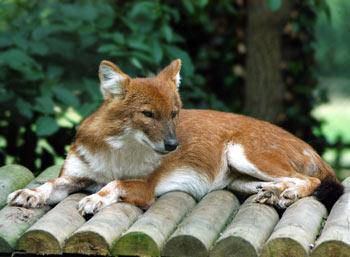

In [77]:
image

In [78]:
image.max(), image.min()

(np.uint8(255), np.uint8(0))

In [79]:
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  5

Now we've seen what an image looks like as a Tensor, let's make a functino to preprocess them.


In [88]:
# Define imae size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size= IMG_SIZE):
  """
   Takes an image file path and turns the image into a Tensor.
  """

  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 color channels(Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-255 to 0.1 values
  image = tf.image.convert_image_dtype((image, tf.float32))
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image



## Turning our data into batches

Why turn our data into batches ?

Let's say you're trying to process 10,000+ images in one go... they all might not fit into memory.

So that's why we do about 32 (this is the batch size) images at a time (you can manually adjust the batch size if need be).

In order to use TensorFlow effectively, we need our data in the form of Tensor tuples which look like this:
`(image, label)`.

In [101]:
# TURNING our data into batches
# Create a simple funtion to return a tuple(image, label)

def get_image_label(image_path, label):
  """
   Takes an image file path name and the associated label,
   processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)

  return image, label

Now we've got a way to turn our data into tuples of Tensors in the form: `(image, label)`, let's make a function to turn all our data (`x` & `y`) into batches!

In [99]:
# Define the batch size, 31 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size= BATCH_SIZE, valid_data = False, test_data=False):
  """
   Creates batches of data out of image (X) and label (y) pairs.
   Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
   Also accepts test data as input (no labels).
  """

  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))
    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)
    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)

  return data_batch


In [103]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train, valid_data=False)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...


TypeError: in user code:

    File "<ipython-input-101-cb2fb3e55ed8>", line 9, in get_image_label  *
        image = process_image(image_path)
    File "<ipython-input-88-da5707622672>", line 15, in process_image  *
        image = tf.image.convert_image_dtype((image, tf.float32))

    TypeError: Missing required positional argument


In [105]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

AttributeError: 'NoneType' object has no attribute 'element_spec'

In [106]:
y[0]

NameError: name 'y' is not defined